# Esonero 1 - 8 Aprile 2021

Completare i seguenti esercizi tramite uno o più blocchi di codice e descrivendo le operazioni effettuate

### Punteggio Esercizi

    1a: 1
    1b: 1.5
    1c: 2
    1d: 1
    2: 1.5
    3: 1
    4: 1
    5: 1


In [1]:
import numpy as np
from skimage.color import rgb2gray
from scipy.ndimage import convolve

import imageio
from skimage.color import rgb2gray

import matplotlib.pyplot as plt
%matplotlib inline 

def myimshow(I, **kwargs):
    # utility function to show image
    plt.figure();
    plt.axis('off')
    plt.imshow(I, cmap=plt.gray(), **kwargs)

# Esercizio 1

## Filtri di Gabor

Il filtro di Gabor (in forma semplificata) è definito dalla seguente funzione che restituisce due parti (reale e immaginaria)


$$RE_g(x,y,\omega,\theta) = \frac{\omega^2}{4\pi^3}\left[\exp\left\{-(\omega^2/8\pi^2) (4x'^2 + y'^2)\right\}\right]\exp\left(\pi^2/2\right)(\omega x \cos \theta)$$

$$IM_g(x,y,\omega,\theta) = \frac{\omega^2}{4\pi^3}\left[\exp\left\{-(\omega^2/8\pi^2) (4x'^2 + y'^2)\right\}\right]\exp\left(\pi^2/2\right)(\omega x \sin \theta)$$

dove $x' = x \cos \theta + y \sin \theta$ e $y' = y \cos \theta. - x \sin \theta$. L'implementazione è data dal codice sottostante: 

In [2]:
zebra =  rgb2gray(imageio.imread('zebra.jpg'))

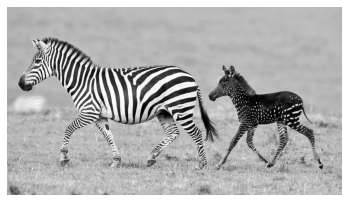

In [3]:
myimshow(zebra)

In [4]:
def genGabor(sz, omega, theta, func=np.cos):
    radius = (int(sz[0]/2.0), int(sz[1]/2.0))
    [x, y] = np.meshgrid(range(-radius[0], radius[0]), range(-radius[1], radius[1]))

    x1 = x * np.cos(theta) + y * np.sin(theta)
    y1 = -x * np.sin(theta) + y * np.cos(theta)
    
    gauss = omega**2 / (4*np.pi**3) * np.exp(- omega**2 / (8*np.pi**2) * ( 4 * x1**2 + y1**2))
    sinusoid = func(omega * x1) * np.exp(np.pi**2 / 2)
    gabor = gauss * sinusoid
    return gabor

`sz` rappresenta la dimensione del filtro, `omega` la frequenza e `theta` l'orientamento.

1. Plottare il filtro per valori a scelta dei parametri

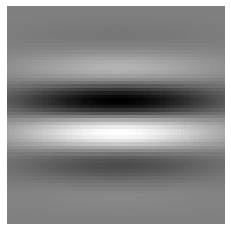

In [129]:
import cv2
gabor = genGabor((64,64), 0.3, np.pi/2, func=np.sin)

myimshow(gabor)

2. Applicare il filtro di Gabor alla figura della zebra e plottare il risultato. Cosa potete dire del filtro?

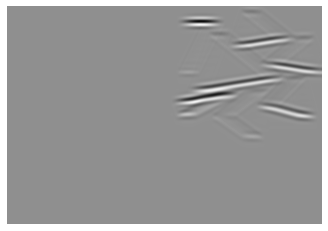

In [130]:
import cv2

# Il filtro sembra controllare se c'è una frequenza con l'orientamento dato in input attorno ad una particolare regione
# evidenzia solo alcune caratteristiche azzerando le altre. 
img2 = cv2.filter2D(zebra, -1, gabor)
myimshow(img2)

3. Aggiustare i parametri di ampiezza e rotazione per individuare le strisce verticali. plottare il risultato

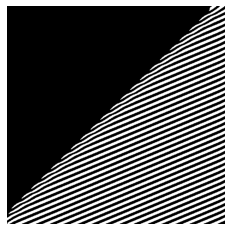

In [132]:
# non ci sono le strisce verticali
gabor1 =  imageio.imread('gabor1.jpg')
gaborFilter = genGabor((128,128), 0.7, np.pi/3, func=np.sin)
img3 = cv2.filter2D(gabor1, -1, gaborFilter)

myimshow(np.clip(img3,0,1))
plt.show()

Per la seguente immagine _gabor1.jpg_

![](gabor1.jpg)

4. Qual è il filtro più semplice che permetterebbe di individuare i contorni? Giustificare la risposta

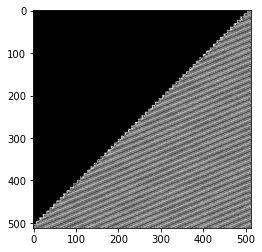

In [78]:

gabor1 =  imageio.imread('gabor1.jpg')

# Essendo tutte linee in diagonali, utilizzo un filtro di sobel 
# che mi permette di individuare le linee sulla diagonale secondaria

secondaryDiag = [[2,1,0], 
               [1,0,-1],
               [0,-1,-2]]

result = np.clip(filters.convolve(gabor1,secondaryDiag,mode='constant', cval=0.0),0,255)
plt.imshow(result,cmap="gray")
plt.show()



# Esercizio 2

Riconoscere il filtro che ha generato questa immagine a partire dall'immagine contenente le forme. Fornire un esempio.

![](filter2.jpg)

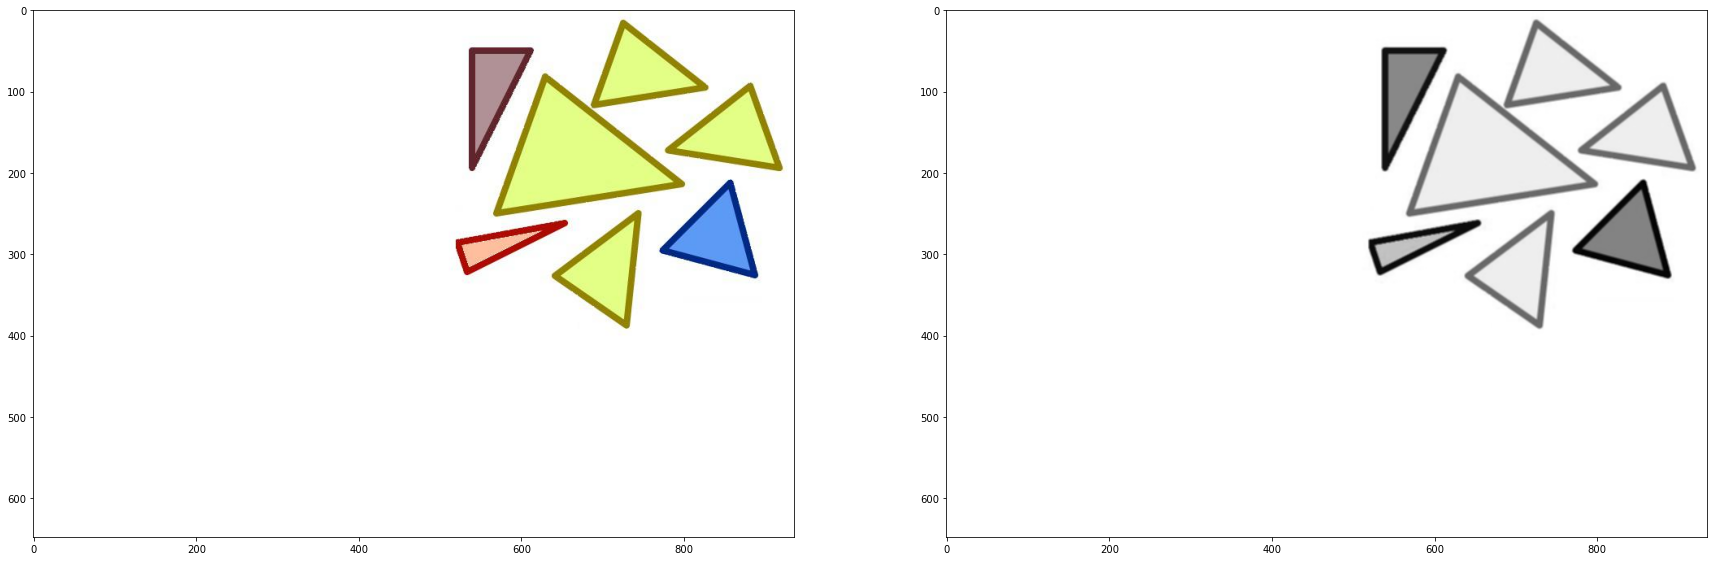

In [235]:
triangoli =  imageio.imread('triangoli.jpg')

triangoli =  imageio.imread('triangoli.jpg')

# sembra la stessa immagine ma in bianco e nero  
result = rgb2gray(triangoli)

result = cv2.GaussianBlur(result,(3,3),3)

plt.figure(figsize=(30,30))
plt.subplot(121)
plt.imshow(triangoli)
plt.subplot(122)
plt.imshow(result,cmap="gray")
plt.show()

# Esercizio 3

Definire una matrice di roto traslazione che effettua una rotazione di 30° in senso orario in (10, 7) e una traslazione di 30 px sull'asse y.
Mostrare e descrivere tutti i passaggi: dalla definizione della matrice all'applicazione della trasformazione

[[ 0.15425146  0.9880316   1.5412642 ]
 [-0.9880316   0.15425146 45.800556  ]]


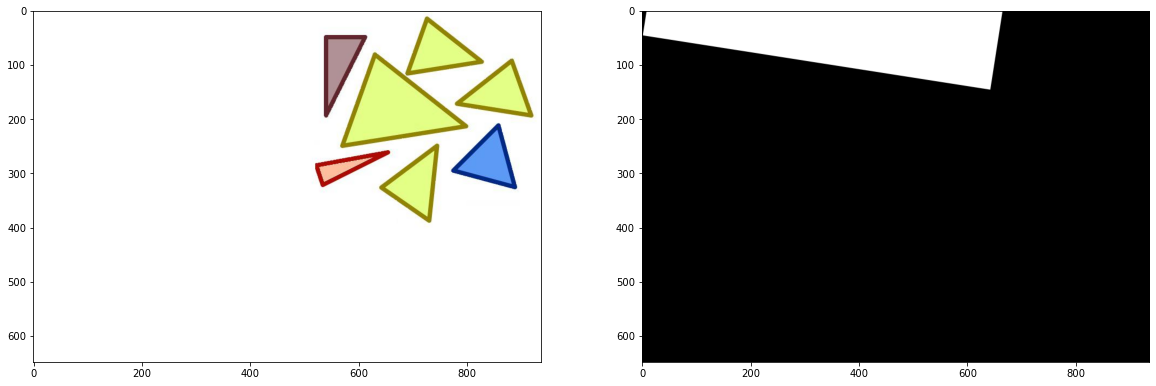

In [166]:
import cv2
import numpy as np
c = (10,7)
M = np.float32([[np.cos(-30), np.sin(-30), (1 - np.cos(-30))*c[0] - c[1]*(np.sin(-30))],
     [-np.sin(-30), np.cos(-30), (np.sin(-30))*c[0] + c[1]*(1 - np.cos(-30)) +30 ]])
     
print(M)     

triangoli =  imageio.imread('triangoli.jpg')


result = cv2.warpAffine(triangoli, M, (cols,rows))

plt.figure(figsize=(20,20))
plt.subplot(121)
plt.imshow(triangoli)
plt.subplot(122)
plt.imshow(result)
plt.show()

# Esercizio 4

Identificare il filtro e riprodurre lo sketch in figura

![](model1.jpg)
![](model1_post.jpg)

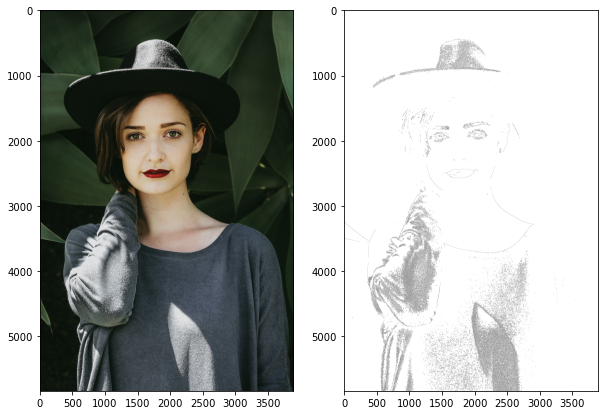

In [278]:
from skimage import filters
from skimage.feature import hog
from skimage import exposure

def change_contrast_lin(img,beta):
    return np.clip(img * beta, 0,1)

model =  imageio.imread('model1.jpg')

gray = rgb2gray(model)
gray=(gray*255).astype(np.uint8)

img_gray_blur = cv2.GaussianBlur(gray, (5,5), 0)

img_gray_blur = (img_gray_blur*255).astype(np.uint8)
edges = cv2.Canny(img_gray_blur, 100, 150, None, 3)

edges = cv2.bitwise_not(edges)



plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(model)
plt.subplot(122)
plt.imshow(edges,cmap="gray")
plt.show()

# Esercizio 5

Scrivere un filtro 3x3 che restituisce un valore positivo se la media dei pixel della diagonale è inferiore al valore del centro, e negativo altrimenti. Cosa calcola tale filtro? Illustrarlo su un'immagine